In [2]:
import os
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
#from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib  as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline
import os, shutil, glob
from PIL import Image
from itertools import cycle
from random import randint
import re, math
import seaborn as sns; sns.set_style("white")
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import datetime
from functools import reduce
#import umap.umap_ as umap

# Set current working directory

In [3]:
from cytominer_eval import evaluate
import tqdm

### Load data

In [4]:
project_dir = "/home/jovyan/share/data/analyses/benjamin/Single_cell_project/"
profiles_deepprofiler = "DeepProfiler_data_RH30_P014561/results/profiles_RH30_deepprofiler.csv"
#profiles_DINO = "scDINO_RH30/results/profiles_DINO.csv"
meta_deep = "DeepProfiler_data_RH30_P014561/Metadata_DeepProfiler_RH30_P014561_new.csv"

In [5]:
df_deepprofiler = pd.read_csv(project_dir + profiles_deepprofiler)
meta_deepprofiler = pd.read_csv(project_dir + meta_deep)

In [6]:
df_deepprofiler.head(10)

,Plate,Well,Site,Label,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_664,Feature_665,Feature_666,Feature_667,Feature_668,Feature_669,Feature_670,Feature_671,Metadata_cmpdName,Metadata_cmpdNameConc
0,P014561,A01,s1.0,blank,0.399322,2.570887,3.407917,2.188924,0.741410,0.485841,...,0.113228,0.835503,1.356412,0.588512,2.453763,1.461091,0.222012,1.467760,blank,blank
1,P014561,A01,s1.0,blank,0.475160,2.606878,3.518675,2.216946,0.751551,0.627631,...,0.026273,0.896924,1.440596,0.526108,2.555503,1.896217,0.353112,1.616847,blank,blank
2,P014561,A01,s1.0,blank,0.556073,2.806769,3.280159,0.678498,1.011360,1.029024,...,-0.107254,1.116905,2.122023,0.826919,2.300837,0.955655,0.956538,1.530467,blank,blank
3,P014561,A01,s1.0,blank,0.370960,2.587542,3.606286,1.802749,0.686067,0.836663,...,-0.205306,0.781751,1.361471,0.617943,1.863175,0.905381,0.539983,1.658991,blank,blank
4,P014561,A01,s1.0,blank,0.740176,2.928717,3.635243,1.612789,0.762111,0.830260,...,-0.142554,0.654671,1.488612,0.457528,1.564337,0.897606,0.577491,1.367513,blank,blank
5,P014561,A01,s1.0,blank,0.455710,2.670783,3.383973,2.243140,0.757727,0.459469,...,-0.134129,0.930254,1.501263,0.700687,2.051140,2.371510,0.225249,1.459853,blank,blank
6,P014561,A01,s1.0,blank,0.369590,2.562297,3.523152,2.075921,0.786147,0.601033,...,-0.129305,0.969443,1.435687,0.607430,2.938366,1.069438,0.210507,1.309244,blank,blank
7,P014561,A01,s1.0,blank,0.456216,2.382979,3.555757,2.039882,0.615266,0.733050,...,-0.049733,0.807688,1.537532,0.523682,2.790394,1.361037,0.541149,1.343459,blank,blank
8,P014561,A01,s1.0,blank,0.758137,2.594607,3.733375,1.937638,0.698863,1.363125,...,-0.113733,0.891969,1.305363,0.596278,2.259808,2.050309,0.916841,1.475345,blank,blank
9,P014561,A01,s1.0,blank,0.408610,2.745083,3.569278,2.119394,0.582135,0.741513,...,0.056206,0.925136,1.395231,0.659125,2.045675,2.268197,0.326545,1.142139,blank,blank


In [8]:
df_deepprofiler['cell_index'] = df_deepprofiler.groupby(['Metadata_cmpdNameConc']).cumcount() + 1

In [7]:
df_deepprofiler.head(100000)

,Plate,Well,Site,Label,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_665,Feature_666,Feature_667,Feature_668,Feature_669,Feature_670,Feature_671,Metadata_cmpdName,Metadata_cmpdNameConc,cell_index
0,P014561,A01,s1.0,blank,0.399322,2.570887,3.407917,2.188924,0.741410,0.485841,...,0.835503,1.356412,0.588512,2.453763,1.461091,0.222012,1.467760,blank,blank,1
1,P014561,A01,s1.0,blank,0.475160,2.606878,3.518675,2.216946,0.751551,0.627631,...,0.896924,1.440596,0.526108,2.555503,1.896217,0.353112,1.616847,blank,blank,2
2,P014561,A01,s1.0,blank,0.556073,2.806769,3.280159,0.678498,1.011360,1.029024,...,1.116905,2.122023,0.826919,2.300837,0.955655,0.956538,1.530467,blank,blank,3
3,P014561,A01,s1.0,blank,0.370960,2.587542,3.606286,1.802749,0.686067,0.836663,...,0.781751,1.361471,0.617943,1.863175,0.905381,0.539983,1.658991,blank,blank,4
4,P014561,A01,s1.0,blank,0.740176,2.928717,3.635243,1.612789,0.762111,0.830260,...,0.654671,1.488612,0.457528,1.564337,0.897606,0.577491,1.367513,blank,blank,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,P014561,J07,s6.0,blank,0.381063,2.120771,3.488869,0.634995,0.699864,0.714016,...,0.777853,1.396483,0.481407,2.345018,1.003507,0.544723,1.448733,Bosutinib,Bosutinib_5,1252
99996,P014561,J07,s6.0,blank,0.535238,2.731568,3.390235,0.257674,0.672786,1.013314,...,0.889489,1.381744,0.573091,2.189048,1.012366,1.541052,1.833773,Bosutinib,Bosutinib_5,1253
99997,P014561,J07,s6.0,blank,0.479096,2.379417,3.548031,1.396466,0.691038,0.430757,...,0.802643,1.323122,0.508805,2.055228,0.985747,0.244428,1.649837,Bosutinib,Bosutinib_5,1254
99998,P014561,J07,s6.0,blank,0.509867,2.444339,3.291651,0.276275,0.855511,0.765691,...,0.991904,1.408323,0.569736,2.240909,0.740398,1.719414,1.922004,Bosutinib,Bosutinib_5,1255


In [6]:

def plot_group_histogram(dataframe, group_column):
    # Group by the specified column and count the number of rows in each group
    group_counts = dataframe.groupby(group_column).size()

      # Create a larger plot
    plt.figure(figsize=(15, 10))
    # Plot the histogram
    plt.bar(group_counts.index, group_counts.values, edgecolor='black')
    plt.xlabel(group_column)
    plt.ylabel('Number of Rows')
    plt.title(f'Histogram of Rows per {group_column}')
    plt.xticks(range(len(group_counts)), group_counts.index, rotation=45, ha='right')# Rotate x-axis labels for better readability
    plt.yticks(range(0, max(group_counts.values) + 1, 2000))
    plt.tight_layout()  # Adjust layout for better display
    plt.show()

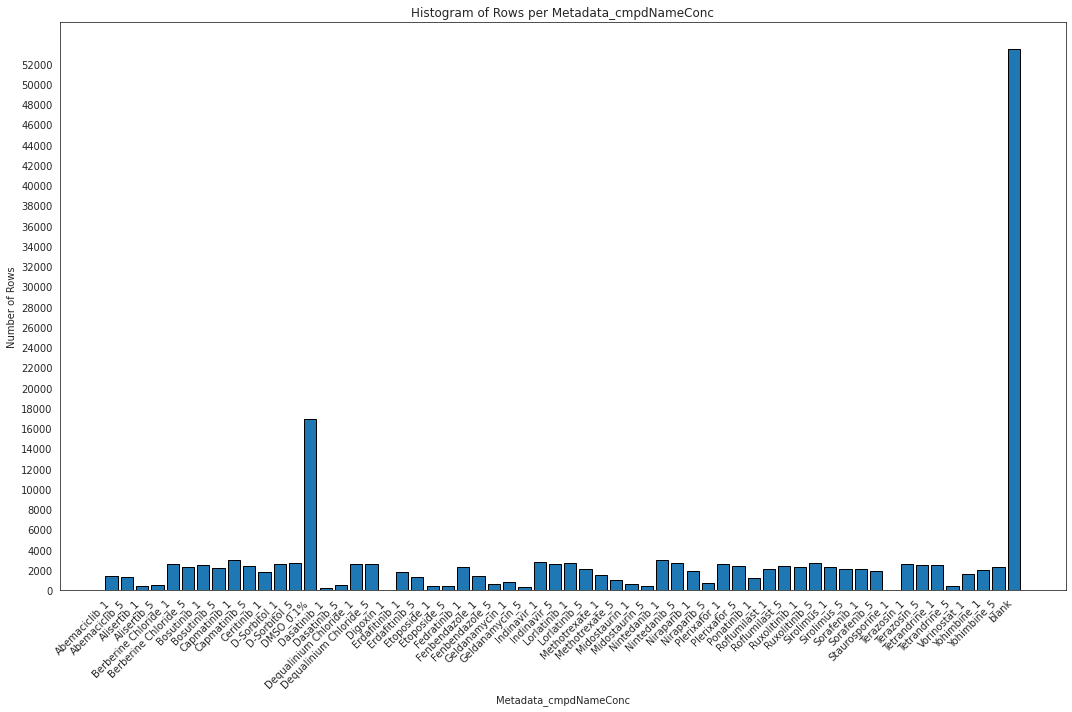

In [7]:
plot_group_histogram(df_deepprofiler, "Metadata_cmpdNameConc")

# Calculate grit scores

### Calculate grit per Compound-Conc for filtering

In [9]:
meta_features =  df_deepprofiler.columns[~df_deepprofiler.columns.str.contains('Feature')].tolist()
features = df_deepprofiler.columns[df_deepprofiler.columns.str.contains('Feature')].tolist()

In [10]:
df_aggregated = df_deepprofiler.groupby(['Metadata_cmpdNameConc', 'Well', 'Site'])[features].mean()

In [11]:
df_aggregated["cell_index"] =df_aggregated.groupby(['Metadata_cmpdNameConc']).cumcount() + 1

In [12]:
df_aggregated = df_aggregated.reset_index()

In [13]:
df_aggregated.head(5)

,Metadata_cmpdNameConc,Well,Site,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_663,Feature_664,Feature_665,Feature_666,Feature_667,Feature_668,Feature_669,Feature_670,Feature_671,cell_index
0,Abemaciclib_1,G07,s1.0,0.730816,2.521333,3.469230,0.803706,0.918770,0.833294,2.551404,...,0.747386,-0.103300,0.808155,1.492752,0.628173,1.988054,1.132024,1.021822,1.504503,1
1,Abemaciclib_1,G07,s2.0,0.541068,2.679199,3.443704,0.712210,0.785674,0.717680,2.577718,...,0.812191,-0.110053,0.877477,1.529407,0.701980,2.077765,0.900171,1.061579,1.319148,2
2,Abemaciclib_1,G07,s3.0,0.586170,2.680980,3.436220,0.743229,0.811820,0.886379,2.471633,...,0.729037,-0.100836,0.903768,1.488121,0.684794,2.104158,1.021869,1.069564,1.451181,3
3,Abemaciclib_1,G07,s4.0,0.570863,2.643788,3.406568,0.622012,0.803106,0.770523,2.498661,...,0.741416,-0.095643,0.851284,1.560906,0.715803,2.207167,0.943898,1.174120,1.401817,4
4,Abemaciclib_1,G07,s5.0,0.658422,2.611400,3.473976,0.775708,0.873551,0.879431,2.494634,...,0.771111,-0.105428,0.829809,1.496435,0.647517,2.067089,1.055433,1.140137,1.562577,5


### Calculate aggregated grit

In [14]:
df_aggregated["Replicate"] = df_aggregated['Metadata_cmpdNameConc'].astype(str) + "_" + df_aggregated["cell_index"].astype(str)

In [15]:
df_aggregated.head(10)

,Metadata_cmpdNameConc,Well,Site,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_664,Feature_665,Feature_666,Feature_667,Feature_668,Feature_669,Feature_670,Feature_671,cell_index,Replicate
0,Abemaciclib_1,G07,s1.0,0.730816,2.521333,3.469230,0.803706,0.918770,0.833294,2.551404,...,-0.103300,0.808155,1.492752,0.628173,1.988054,1.132024,1.021822,1.504503,1,Abemaciclib_1_1
1,Abemaciclib_1,G07,s2.0,0.541068,2.679199,3.443704,0.712210,0.785674,0.717680,2.577718,...,-0.110053,0.877477,1.529407,0.701980,2.077765,0.900171,1.061579,1.319148,2,Abemaciclib_1_2
2,Abemaciclib_1,G07,s3.0,0.586170,2.680980,3.436220,0.743229,0.811820,0.886379,2.471633,...,-0.100836,0.903768,1.488121,0.684794,2.104158,1.021869,1.069564,1.451181,3,Abemaciclib_1_3
3,Abemaciclib_1,G07,s4.0,0.570863,2.643788,3.406568,0.622012,0.803106,0.770523,2.498661,...,-0.095643,0.851284,1.560906,0.715803,2.207167,0.943898,1.174120,1.401817,4,Abemaciclib_1_4
4,Abemaciclib_1,G07,s5.0,0.658422,2.611400,3.473976,0.775708,0.873551,0.879431,2.494634,...,-0.105428,0.829809,1.496435,0.647517,2.067089,1.055433,1.140137,1.562577,5,Abemaciclib_1_5
5,Abemaciclib_1,H09,s1.0,0.675774,2.574934,3.455834,0.736415,0.856526,0.894212,2.496794,...,-0.093926,0.913531,1.492063,0.633390,2.195977,1.089695,1.130336,1.568592,6,Abemaciclib_1_6
6,Abemaciclib_1,H09,s2.0,0.689699,2.575676,3.418595,0.594786,0.898813,0.852310,2.549033,...,-0.083409,0.832232,1.575767,0.653814,2.010510,1.063663,1.206309,1.619883,7,Abemaciclib_1_7
7,Abemaciclib_1,H09,s3.0,0.634595,2.658562,3.453771,0.641867,0.848239,0.869678,2.497650,...,-0.092632,0.878806,1.492706,0.637552,2.198680,0.994061,1.203365,1.518308,8,Abemaciclib_1_8
8,Abemaciclib_1,H09,s4.0,0.658802,2.651866,3.413358,0.514681,0.857345,0.843659,2.526318,...,-0.077563,0.857513,1.528862,0.643611,2.168822,1.029148,1.167644,1.597094,9,Abemaciclib_1_9
9,Abemaciclib_1,H09,s5.0,0.616940,2.696063,3.436096,0.537464,0.852451,0.886051,2.489977,...,-0.098637,0.928440,1.490285,0.672922,2.159867,0.978927,1.208771,1.592209,10,Abemaciclib_1_10


In [16]:
control_perts_agg = df_aggregated.query("Metadata_cmpdNameConc == 'DMSO_0.1%'").Replicate.unique().tolist() # This makes a list of wells that contain DMSO
print(control_perts_agg)

['DMSO_0.1%_1', 'DMSO_0.1%_2', 'DMSO_0.1%_3', 'DMSO_0.1%_4', 'DMSO_0.1%_5', 'DMSO_0.1%_6', 'DMSO_0.1%_7', 'DMSO_0.1%_8', 'DMSO_0.1%_9', 'DMSO_0.1%_10', 'DMSO_0.1%_11', 'DMSO_0.1%_12', 'DMSO_0.1%_13', 'DMSO_0.1%_14', 'DMSO_0.1%_15', 'DMSO_0.1%_16', 'DMSO_0.1%_17', 'DMSO_0.1%_18', 'DMSO_0.1%_19', 'DMSO_0.1%_20', 'DMSO_0.1%_21', 'DMSO_0.1%_22', 'DMSO_0.1%_23', 'DMSO_0.1%_24', 'DMSO_0.1%_25', 'DMSO_0.1%_26', 'DMSO_0.1%_27', 'DMSO_0.1%_28', 'DMSO_0.1%_29', 'DMSO_0.1%_30', 'DMSO_0.1%_31', 'DMSO_0.1%_32', 'DMSO_0.1%_33', 'DMSO_0.1%_34', 'DMSO_0.1%_35', 'DMSO_0.1%_36', 'DMSO_0.1%_37', 'DMSO_0.1%_38', 'DMSO_0.1%_39', 'DMSO_0.1%_40', 'DMSO_0.1%_41', 'DMSO_0.1%_42', 'DMSO_0.1%_43', 'DMSO_0.1%_44', 'DMSO_0.1%_45', 'DMSO_0.1%_46', 'DMSO_0.1%_47', 'DMSO_0.1%_48', 'DMSO_0.1%_49', 'DMSO_0.1%_50', 'DMSO_0.1%_51', 'DMSO_0.1%_52', 'DMSO_0.1%_53', 'DMSO_0.1%_54', 'DMSO_0.1%_55', 'DMSO_0.1%_56', 'DMSO_0.1%_57', 'DMSO_0.1%_58', 'DMSO_0.1%_59', 'DMSO_0.1%_60', 'DMSO_0.1%_61', 'DMSO_0.1%_62', 'DMSO_0.1%_63', 

In [17]:
neg_control_agg = df_aggregated.query("Metadata_cmpdNameConc == 'DMSO_0.1%'").reset_index(drop=True)

In [18]:
grit_replicate_groups_single_cell = {
    "profile_col": "Replicate", 
    "replicate_group_col": 'Metadata_cmpdNameConc'
}

In [19]:
from tqdm import tqdm
grit_scores = []
compounds = df_aggregated.Metadata_cmpdNameConc.unique()
for comp in tqdm(compounds):
    if comp == "DMSO" or comp =="blank":
        continue
    #print("Now analysing", comp)
    subset_guide_df = pd.concat(
                [df_aggregated.query("Metadata_cmpdNameConc == @comp"), neg_control_agg]
            ).reset_index(drop=True)
    grit_results = evaluate(
        profiles=subset_guide_df,
        features=features,
        meta_features=["Metadata_cmpdNameConc", "Replicate", "cell_index", "Well", "Site"],
        replicate_groups=grit_replicate_groups_single_cell,
        operation="grit",
        similarity_metric="pearson",
        grit_replicate_summary_method="mean", # median
        grit_control_perts=control_perts_agg
        )
    grit_temp = grit_results.assign(comp = comp)
    #grit_results= grit_temp.merge(df_aggregated[['cell_index', 'Replicate' ]], left_on = 'Metadata_cmpdNameConc', right_on = 'Replicate')
    grit_scores.append(grit_temp)
    

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:18<00:00,  3.22it/s]


In [20]:
grit_scores = pd.concat(grit_scores).reset_index(drop=True)

In [21]:
grit_scores

,perturbation,group,grit,comp
0,Abemaciclib_1_1,Abemaciclib_1,0.721964,Abemaciclib_1
1,Abemaciclib_1_10,Abemaciclib_1,1.028426,Abemaciclib_1
2,Abemaciclib_1_11,Abemaciclib_1,0.842024,Abemaciclib_1
3,Abemaciclib_1_2,Abemaciclib_1,0.881127,Abemaciclib_1
4,Abemaciclib_1_3,Abemaciclib_1,0.895527,Abemaciclib_1
...,...,...,...,...
5404,Yohimbine_5_5,Yohimbine_5,0.207546,Yohimbine_5
5405,Yohimbine_5_6,Yohimbine_5,-0.225776,Yohimbine_5
5406,Yohimbine_5_7,Yohimbine_5,0.155773,Yohimbine_5
5407,Yohimbine_5_8,Yohimbine_5,0.058228,Yohimbine_5


In [26]:
def plot_grit(df, method, info):
  plt.figure(figsize=(18, 10))
  sns.barplot(x='group', y='grit', data=df)
  
  plt.xlabel('Compound Conc')
  plt.ylabel('Grit score')
  plt.xticks(ticks=range(len(df['group'])), labels=df['group'], rotation=45)
  plt.title(f'Bar plot of grit scores for {method}, {info}')
  plt.tight_layout()
  plt.axhline(y=0.8, color='r', linestyle='--')
  plt.axhline(y=5, color='r', linestyle='--')
  plt.show()

In [24]:
grit_scores_aggregated = grit_scores.groupby(["group"])["grit"].mean()
grit_scores_aggregated = grit_scores_aggregated.reset_index()
#grit_scores_aggregated = grit_scores_aggregated[(grit_scores_aggregated['grit'] >= 0.8) & (grit_scores_aggregated['grit'] <= 5.0)]

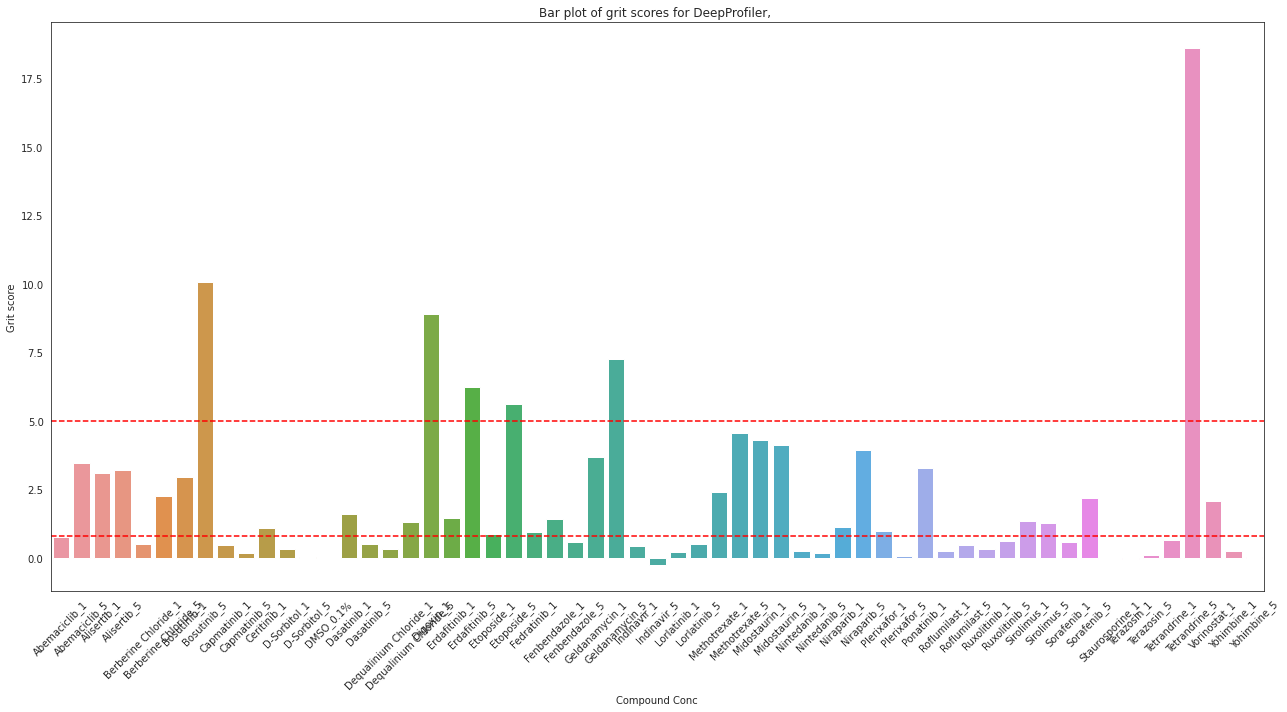

In [28]:
plot_grit(grit_scores_aggregated, "DeepProfiler", "")

In [80]:
exclude_comp_conc = grit_scores_aggregated["group"].tolist()
exclude_comp_conc = exclude_comp_conc + ['DMSO_0.1%']
print(exclude_comp_conc)

['Abemaciclib_5', 'Alisertib_1', 'Alisertib_5', 'Berberine Chloride_5', 'Bosutinib_1', 'Ceritinib_1', 'Dasatinib_1', 'Dequalinium Chloride_5', 'Erdafitinib_1', 'Etoposide_1', 'Fedratinib_1', 'Fenbendazole_1', 'Geldanamycin_1', 'Methotrexate_1', 'Methotrexate_5', 'Midostaurin_1', 'Midostaurin_5', 'Niraparib_1', 'Niraparib_5', 'Plerixafor_1', 'Ponatinib_1', 'Sirolimus_1', 'Sirolimus_5', 'Sorafenib_5', 'Vorinostat_1', 'DMSO_0.1%']


### Calculate grit Single Cell level

#### Filter all comp-conc with aggregated grit between 0.8 and 5

In [81]:
df_deepprofiler_filtered = df_deepprofiler[df_deepprofiler['Metadata_cmpdNameConc'].isin(exclude_comp_conc)]

In [88]:
df_deepprofiler_filtered.head(5)

,Plate,Well,Site,Label,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_666,Feature_667,Feature_668,Feature_669,Feature_670,Feature_671,Metadata_cmpdName,Metadata_cmpdNameConc,cell_index,Replicate
19959,P014561,B04,s1.0,blank,0.512600,2.664176,3.646327,1.888292,0.785803,0.547927,...,1.253691,0.628869,1.691450,1.775389,0.223657,1.103010,Geldanamycin,Geldanamycin_1,1,Geldanamycin_1_1
19960,P014561,B04,s1.0,blank,0.424705,2.748411,3.560933,1.980795,0.911027,0.601231,...,1.334351,0.810507,2.142132,1.417575,0.340938,1.266259,Geldanamycin,Geldanamycin_1,2,Geldanamycin_1_2
19961,P014561,B04,s1.0,blank,0.539426,2.758274,3.651001,1.406210,0.741793,0.925411,...,1.368502,0.778588,2.159286,0.754983,0.235693,1.789616,Geldanamycin,Geldanamycin_1,3,Geldanamycin_1_3
19962,P014561,B04,s1.0,blank,0.423495,2.859304,3.518588,0.915230,0.642910,1.293669,...,1.489442,0.530272,2.191189,0.768240,0.829143,1.608813,Geldanamycin,Geldanamycin_1,4,Geldanamycin_1_4
19963,P014561,B04,s1.0,blank,0.413807,2.641869,3.528639,0.879393,0.650014,0.753518,...,1.529406,0.682674,1.812095,0.576620,0.641283,1.871972,Geldanamycin,Geldanamycin_1,5,Geldanamycin_1_5


### Do calculations

In [89]:
df_deepprofiler_filtered["Replicate"] = df_deepprofiler_filtered['Metadata_cmpdNameConc'].astype(str) + "_" + df_deepprofiler_filtered["cell_index"].astype(str)

<ipython-input-89-234321066289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deepprofiler_filtered["Replicate"] = df_deepprofiler_filtered['Metadata_cmpdNameConc'].astype(str) + "_" + df_deepprofiler_filtered["cell_index"].astype(str)


In [20]:
grit_replicate_groups_single_cell = {
    "profile_col": "Replicate", 
    "replicate_group_col": 'Metadata_cmpdNameConc'
}

In [90]:
control_perts = df_deepprofiler_filtered.query("Metadata_cmpdName == 'DMSO'").Replicate.unique().tolist() # This makes a list of wells that contain DMSO
print(control_perts)

['DMSO_0.1%_1', 'DMSO_0.1%_2', 'DMSO_0.1%_3', 'DMSO_0.1%_4', 'DMSO_0.1%_5', 'DMSO_0.1%_6', 'DMSO_0.1%_7', 'DMSO_0.1%_8', 'DMSO_0.1%_9', 'DMSO_0.1%_10', 'DMSO_0.1%_11', 'DMSO_0.1%_12', 'DMSO_0.1%_13', 'DMSO_0.1%_14', 'DMSO_0.1%_15', 'DMSO_0.1%_16', 'DMSO_0.1%_17', 'DMSO_0.1%_18', 'DMSO_0.1%_19', 'DMSO_0.1%_20', 'DMSO_0.1%_21', 'DMSO_0.1%_22', 'DMSO_0.1%_23', 'DMSO_0.1%_24', 'DMSO_0.1%_25', 'DMSO_0.1%_26', 'DMSO_0.1%_27', 'DMSO_0.1%_28', 'DMSO_0.1%_29', 'DMSO_0.1%_30', 'DMSO_0.1%_31', 'DMSO_0.1%_32', 'DMSO_0.1%_33', 'DMSO_0.1%_34', 'DMSO_0.1%_35', 'DMSO_0.1%_36', 'DMSO_0.1%_37', 'DMSO_0.1%_38', 'DMSO_0.1%_39', 'DMSO_0.1%_40', 'DMSO_0.1%_41', 'DMSO_0.1%_42', 'DMSO_0.1%_43', 'DMSO_0.1%_44', 'DMSO_0.1%_45', 'DMSO_0.1%_46', 'DMSO_0.1%_47', 'DMSO_0.1%_48', 'DMSO_0.1%_49', 'DMSO_0.1%_50', 'DMSO_0.1%_51', 'DMSO_0.1%_52', 'DMSO_0.1%_53', 'DMSO_0.1%_54', 'DMSO_0.1%_55', 'DMSO_0.1%_56', 'DMSO_0.1%_57', 'DMSO_0.1%_58', 'DMSO_0.1%_59', 'DMSO_0.1%_60', 'DMSO_0.1%_61', 'DMSO_0.1%_62', 'DMSO_0.1%_63', 

In [33]:
neg_control = df_deepprofiler.query("Metadata_cmpdName == 'DMSO'").reset_index(drop=True)
neg_control_samp = neg_control.sample(frac=0.1, random_state=42) 

In [ ]:
from tqdm import tqdm
grit_scores = []
compounds = df_deepprofiler.Metadata_cmpdName.unique()
for comp in tqdm(compounds):
    if comp == "DMSO" or comp =="blank":
        continue
    print("Now analysing", comp)
    subset_guide_df = pd.concat(
                [df_deepprofiler.query("Metadata_cmpdName == @comp"), neg_control]
            ).reset_index(drop=True)
    grit_results_single_cell = evaluate(
        profiles=subset_guide_df,
        features=features,
        meta_features=meta_features,
        replicate_groups=grit_replicate_groups_single_cell,
        operation="grit",
        similarity_metric="pearson",
        grit_replicate_summary_method="mean", # median
        grit_control_perts=control_perts
        )
    grit_temp = grit_results_single_cell.assign(comp = comp)
    grit_results_single_cell = grit_temp.merge(df_deepprofiler[['Count_nuclei', 'Replicate' ]], left_on = 'Label', right_on = 'Replicate')
    grit_scores.append(grit_results)

  0%|          | 0/34 [00:00<?, ?it/s]

Now analysing Indinavir


In [ ]:
grit_results_single_cell = grit_temp.merge(df_deepprofiler[['Count_nuclei', 'Replicate' ]], left_on = 'Label', right_on = 'Replicate')
    grit_scores_single_cell.append(grit_results)

### Grit scores per image, grouped with compound and dose

In [ ]:
grit_scores_df = pd.concat(grit_score_single_cell).reset_index(drop=True)
print("Before", grit_scores_df.shape)
grit_scores_df['compound'] = grit_scores_df.perturbation.str.split('_').str[0]
grit_scores_df['dose'] = grit_scores_df.perturbation.str.split('_').str[1].astype(float)
grit_scores_df.to_csv('{}/GritScores_{}.csv'.format(OutputDir, CellLine), sep=';')
print("After", grit_scores_df.shape)
#grit_scores.head()

### Grit scores per compound/concentration

In [ ]:
grit_scores_grouped = grit_scores_df.groupby('group').mean(numeric_only=True)

grit_scores_grouped['compound'] = grit_scores_grouped.index.str.split('_').str[0]
grit_scores_grouped['dose'] = grit_scores_grouped.index.str.split('_').str[1].astype(float)

grit_scores_grouped.sort_values(by=['compound', 'dose'], inplace=True)
grit_scores_grouped.to_csv('{}/GritScoresGrouped_{}.csv'.format(OutputDir, CellLine), sep=';')
#grit_scores_grouped

In [ ]:
print("test")